In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score
# feel free to add more if you need

In [2]:
# load data
data_raw = pd.read_csv('C:/Data/DataCoSupplyChainDataset.csv', encoding = "ISO-8859-1")

# load data description
data_description = pd.read_csv('C:/Data/DescriptionDataCoSupplyChain.csv', encoding = "ISO-8859-1")

Learning the Variables

Are all the features going to be helpful for our prediction task? In other words, do you expect any correlation or dependencies between the response variables and custormers' information (i.e. Custormer ID, Custormer Email, etc.)? 
<br>
If not, then we may consider remove some of the redundant variables (categorical and continuous).

In [3]:
data_raw.select_dtypes(include = ["object"]).columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Region', 'Order State', 'Order Status', 'Product Image',
       'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

In [4]:
data_raw.select_dtypes(include = ["object"])

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,...,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,...,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,...,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,...,Shanghái,China,1/16/2016 3:40,Eastern Asia,Shanghái,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,...,Hirakata,Japón,1/16/2016 1:34,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,...,Adelaide,Australia,1/15/2016 21:00,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Adelaide,Australia,1/15/2016 20:18,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


In [5]:
# removing redundant categorical features for modeling
remove_cat = ['Category Name', 'Customer City', 
               'Customer Country', 'Customer Email', 
               'Customer Fname', 'Customer Lname', 
               'Customer Password', 'Customer State',
               'Customer Street', 'Department Name',
               'Market', 'Order City', 'Order Country',
               'Order Region', 'Order State', 'Product Image',
               'Product Name']

In [6]:
data_raw.select_dtypes(exclude = ["object"]).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id',
       'Latitude', 'Longitude', 'Order Customer Id', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Zipcode',
       'Product Card Id', 'Product Category Id', 'Product Description',
       'Product Price', 'Product Status'],
      dtype='object')

In [7]:
data_raw.select_dtypes(exclude = ["object"])

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
0,3,4,91.250000,314.640015,0,73,20755,725.0,2,18.251453,...,1,327.750000,314.640015,91.250000,NaN,1360,73,NaN,327.750000,0
1,5,4,-249.089996,311.359985,1,73,19492,725.0,2,18.279451,...,1,327.750000,311.359985,-249.089996,NaN,1360,73,NaN,327.750000,0
2,4,4,-247.779999,309.720001,0,73,19491,95125.0,2,37.292233,...,1,327.750000,309.720001,-247.779999,NaN,1360,73,NaN,327.750000,0
3,3,4,22.860001,304.809998,0,73,19490,90027.0,2,34.125946,...,1,327.750000,304.809998,22.860001,NaN,1360,73,NaN,327.750000,0
4,2,4,134.210007,298.250000,0,73,19489,725.0,2,18.253769,...,1,327.750000,298.250000,134.210007,NaN,1360,73,NaN,327.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,4,4,40.000000,399.980011,0,45,1005,11207.0,7,40.640930,...,1,399.980011,399.980011,40.000000,NaN,1004,45,NaN,399.980011,0
180515,3,2,-613.770019,395.980011,1,45,9141,93304.0,7,35.362545,...,1,399.980011,395.980011,-613.770019,NaN,1004,45,NaN,399.980011,0
180516,5,4,141.110001,391.980011,1,45,291,6010.0,7,41.629959,...,1,399.980011,391.980011,141.110001,NaN,1004,45,NaN,399.980011,0
180517,3,4,186.229996,387.980011,0,45,2813,725.0,7,18.213350,...,1,399.980011,387.980011,186.229996,NaN,1004,45,NaN,399.980011,0


In [8]:
# removing redundant continuous features for modeling
remove_cts = ['Category Id', 'Customer Id', 'Customer Zipcode',
               'Department Id', 'Customer Id', 'Order Id', 
               'Order Item Cardprod Id', 'Order Item Id',
               'Order Zipcode', 'Product Card Id', 'Product Category Id',
               'Product Description', 'Product Status', 'Latitude', 'Longitude', 
               'Order Customer Id']

Now, let's do a brief EDA and prepare our data for modeling

Check for missing values

In [9]:
data_raw.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Check for duplicate observations

In [10]:
data_raw.duplicated().any()

False

Remove redundant categorical and continuous features for modeling

In [11]:
remove_list = remove_cat + remove_cts
data_raw.drop(remove_list, axis=1, inplace=True)

# check the dimension of the data
data_raw.shape

(180519, 21)

Check for missing values after removing redundent features

In [12]:
data_raw.isna().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Customer Segment                 0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Status                     0
Product Price                    0
shipping date (DateOrders)       0
Shipping Mode                    0
dtype: int64

Plot a correlation heatmap

<Axes: >

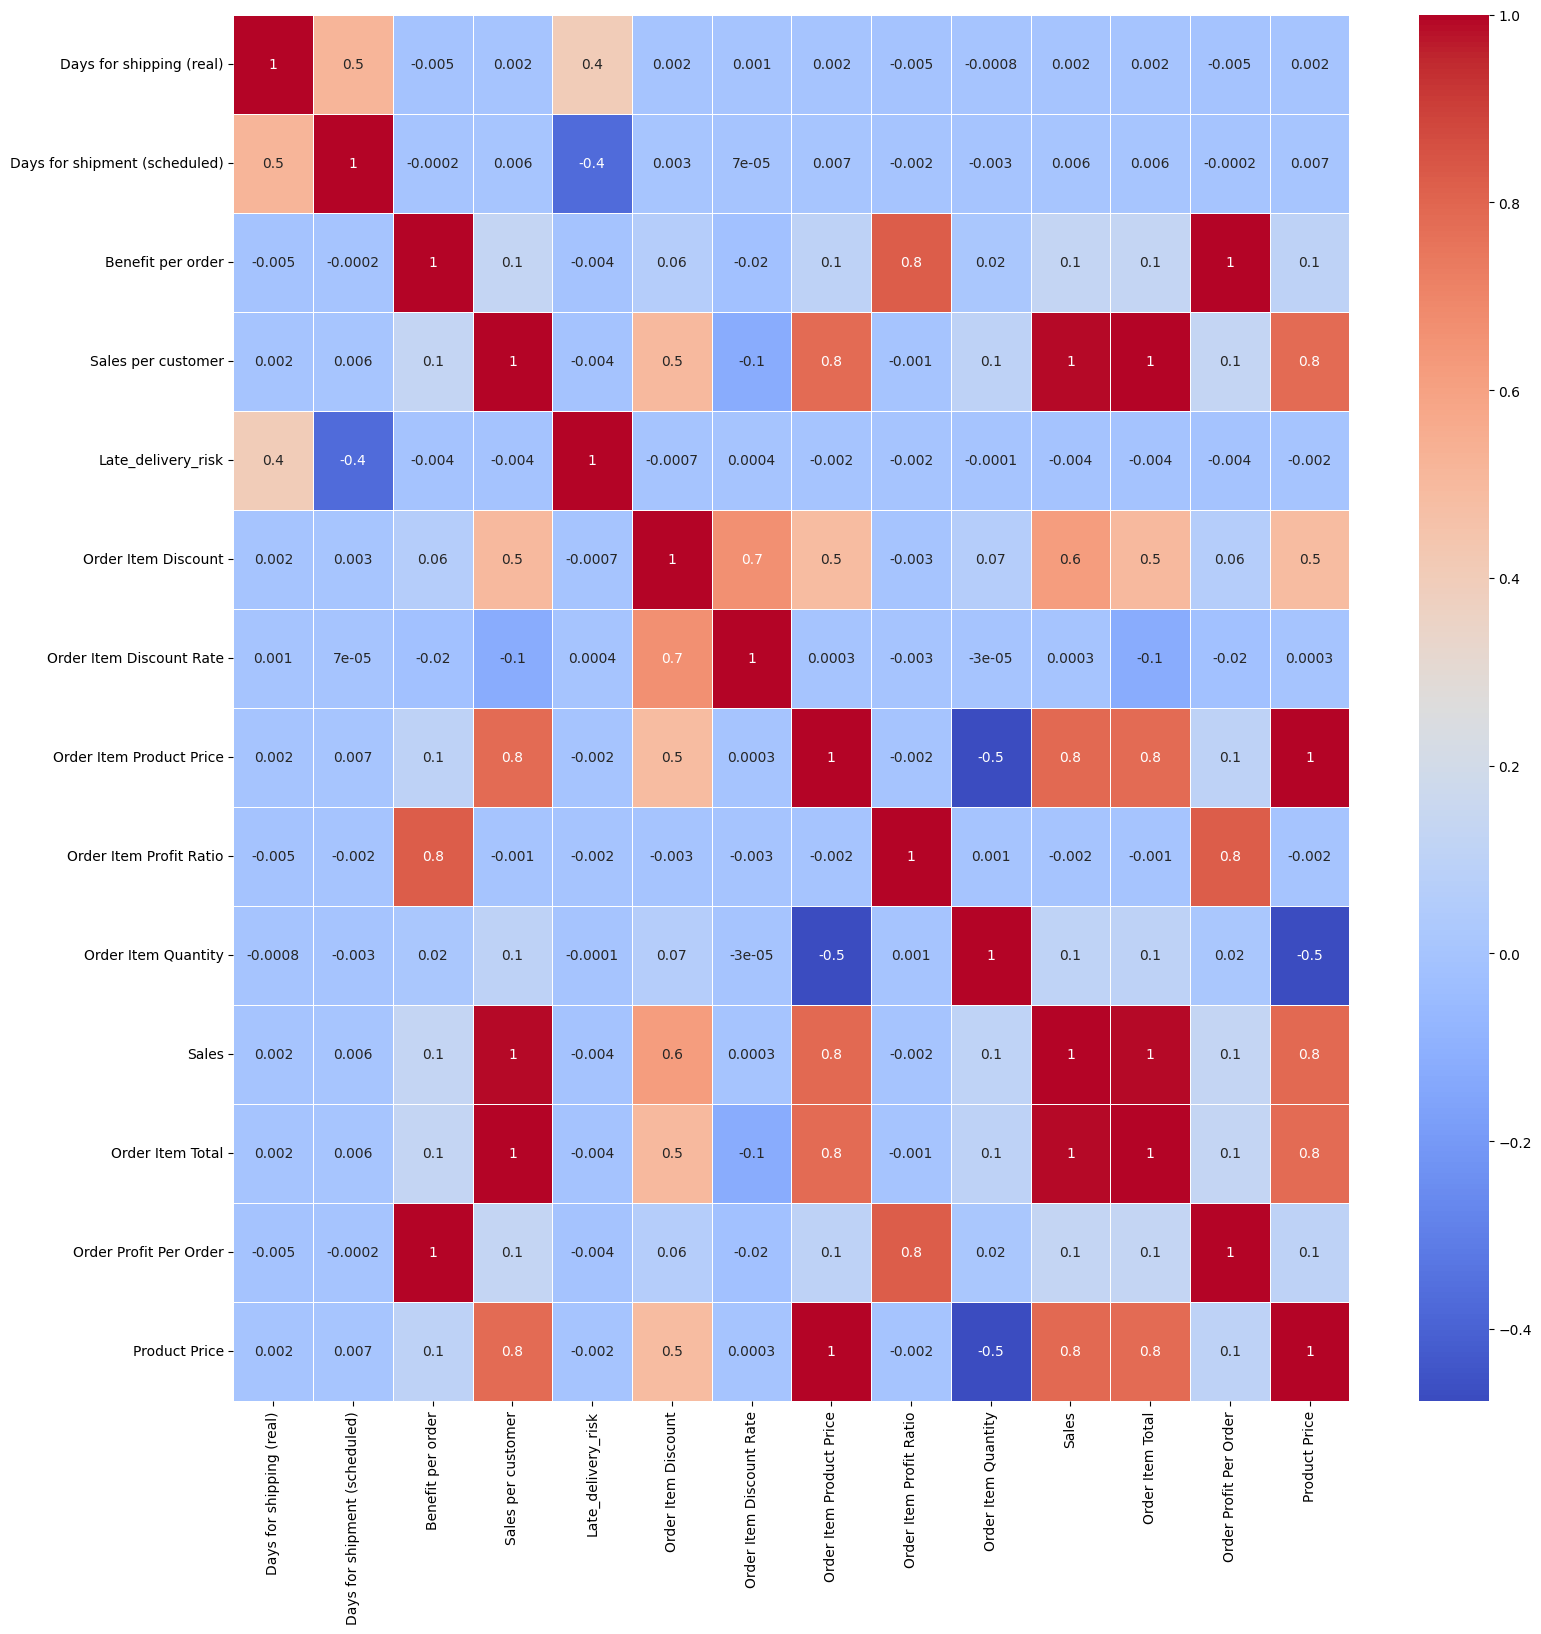

In [13]:
fig, ax = plt.subplots(figsize = (18, 18))   
sns.heatmap(data_raw.select_dtypes(exclude=['object']).corr(), annot = True, linewidths = 0.5, fmt = '.1g', cmap = 'coolwarm')

Encodings

In [14]:
# one-hot encoding for categorical variables
ohe_data = pd.get_dummies(data_raw, columns = ['Type', 'Shipping Mode'])
ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']] = ohe_data[['Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class']].astype(int)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Benefit per order              180519 non-null  float64
 3   Sales per customer             180519 non-null  float64
 4   Delivery Status                180519 non-null  object 
 5   Late_delivery_risk             180519 non-null  int64  
 6   Customer Segment               180519 non-null  object 
 7   order date (DateOrders)        180519 non-null  object 
 8   Order Item Discount            180519 non-null  float64
 9   Order Item Discount Rate       180519 non-null  float64
 10  Order Item Product Price       180519 non-null  float64
 11  Order Item Profit Ratio        180519 non-null  float64
 12  Order Item Quantity           

Detect / Remove / Replace Outliers (if any)

In [15]:
# melt data frame into long format
data_melted = pd.melt(ohe_data.select_dtypes(include = ["float"]))
# view first 10 rows of melted data frame
data_melted.head(10)

,variable,value
0,Benefit per order,91.250000
1,Benefit per order,-249.089996
2,Benefit per order,-247.779999
3,Benefit per order,22.860001
4,Benefit per order,134.210007
5,Benefit per order,18.580000
6,Benefit per order,95.180000
7,Benefit per order,68.430000
8,Benefit per order,133.720001
9,Benefit per order,132.149994


<Axes: xlabel='value', ylabel='variable'>

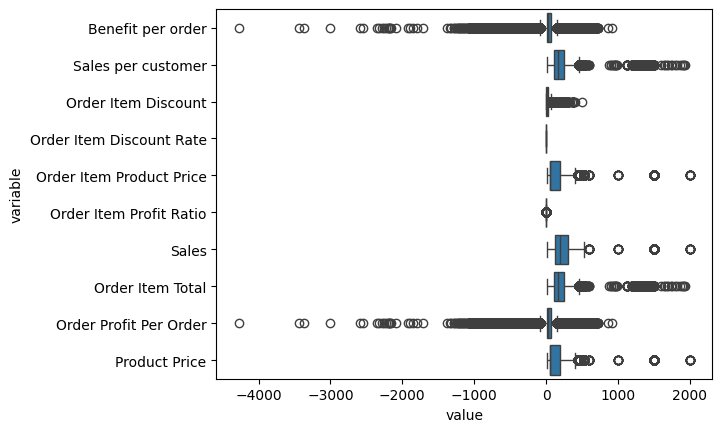

In [16]:
sns.boxplot(y='variable', x='value', data = data_melted)

In [17]:
# Z-score
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from Z-scores method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
10 Outliers Sample in ' Benefit per order ' from Z-scores method:  [-425.5799866, -783.6699829, 595.3499756, 415.7999878, -459.0, -447.0499878, -459.6700134, -540.789978, -652.4299927, -790.4199829]


Outliers length in ' Sales per customer ' from Z-scores method:  477
10 Outliers Sample in ' Sales per customer ' from Z-scores method:  [1417.5, 1395.0, 1365.0, 1200.0, 989.9899902, 1230.0, 1275.0, 1245.0, 1125.0, 1417.5]


Outliers length in ' Order Item Discount ' from Z-scores method:  2106
10 Outliers Sample in ' Order Item Discount ' from Z-scores method:  [112.4899979, 105.0, 135.0, 300.0, 113.0100021, 124.9899979, 99.98999786, 89.98999786, 89.98999786, 89.98999786]


Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from Z-scores method:  []


Outliers length in ' Order Item Product Price ' from Z-scores method:  488
10 Outliers Sample in '

In [18]:
# IQR
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    sample_outliers = detect_outliers_iqr(ohe_data[i])
    print("Outliers length in '", i, "' from IQR method: ", len(sample_outliers))
    print("10 Outliers Sample in '", i, "' from IQR method: ", sample_outliers[:10])
    print('\n')

Outliers length in ' Benefit per order ' from IQR method:  18942
10 Outliers Sample in ' Benefit per order ' from IQR method:  [-4274.97998, -3442.5, -3366.0, -3000.0, -2592.0, -2550.0, -2351.25, -2328.0, -2280.0, -2255.25]


Outliers length in ' Sales per customer ' from IQR method:  1943
10 Outliers Sample in ' Sales per customer ' from IQR method:  [463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963, 463.3399963]


Outliers length in ' Order Item Discount ' from IQR method:  7537
10 Outliers Sample in ' Order Item Discount ' from IQR method:  [67.48999786, 67.48999786, 67.48999786, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756, 67.80999756]


Outliers length in ' Order Item Discount Rate ' from IQR method:  0
10 Outliers Sample in ' Order Item Discount Rate ' from IQR method:  []


Outliers length in ' Order Item Product Price ' from IQR method:  2048
10 Outliers Sample in ' Order Item Pr

In [19]:
# Removing outliers from z-score method and replacing the removed with median
for i in ohe_data.select_dtypes(include=["float"]).columns:
    outliers = []
    median = np.median(ohe_data[i])
    sample_outliers = detect_outliers_zscore(ohe_data[i])
    print("Outliers length in '", i, "' from Z-scores method: ", len(sample_outliers))
    for j in sample_outliers:
        ohe_data.loc[ohe_data[i] == j, i] = median
    print('Outliers have been removed and replaced with median')

Outliers length in ' Benefit per order ' from Z-scores method:  3608
Outliers have been removed and replaced with median
Outliers length in ' Sales per customer ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount ' from Z-scores method:  2106
Outliers have been removed and replaced with median
Outliers length in ' Order Item Discount Rate ' from Z-scores method:  0
Outliers have been removed and replaced with median
Outliers length in ' Order Item Product Price ' from Z-scores method:  488
Outliers have been removed and replaced with median
Outliers length in ' Order Item Profit Ratio ' from Z-scores method:  6013
Outliers have been removed and replaced with median
Outliers length in ' Sales ' from Z-scores method:  467
Outliers have been removed and replaced with median
Outliers length in ' Order Item Total ' from Z-scores method:  477
Outliers have been removed and replaced with median
Outliers length in ' Order Pr